# Chafee-Infante方程式の離散化

In [1]:
import numpy as np
import pathfollowing as pf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

In [2]:
N = 16
ds = np.pi / N

In [3]:
def func(x, a):
    n = len(x)
    A = np.zeros(n)
    A = 2 * np.identity(n)
    for m in range(n-1):
        A[m,m+1] = -1.0
        A[m+1,m] = -1.0
    return A @ x - (ds**2) * (a[0] * x - x**3/3) 

def dfdx(x, a):
    n = len(x)
    A = 2 * np.identity(n)
    for m in range(n-1):
        A[m,m+1] = -1.0
        A[m+1,m] = -1.0
    for m in range(n):
        A[m,m] -= (ds**2) * (a[0] - x[m]**2)
    return A

def dfda(x,a):
    return np.array([[-(ds**2) * y for y in x]])

In [4]:
x=np.zeros(N)
a=np.array([0.5])
bd,bp,lp=pf.pathfollow(x, a, func, dfdx, dfda,nmax=800, h=0.05, epsr=1.0e-14, epsb=1.0e-14, quiet=True)

In [5]:
for i in bp:
    print(i,bd[i]['a'], bd[i+1]['a'])

8 [0.88329508] [0.9]
62 [3.50310075] [3.55]
148 [7.77020267] [7.8]
264 [13.53928982] [13.55]
407 [20.61390284] [20.65]
571 [28.75312427] [28.8]
750 [37.67978269] [37.7]


In [6]:
v02 = pf.calcSwitchingVectorBP(bd[bp[0]], func, dfdx, dfda)
x02=bd[bp[0]]['x']
a02=bd[bp[0]]['a']
bd02,bp02,lp02=pf.pathfollow(x02, a02, func, dfdx, dfda, w=v02, nmax=1000, h=0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

In [7]:
v12 = pf.calcSwitchingVectorBP(bd[bp[1]], func, dfdx, dfda)
x12=bd[bp[1]]['x']
a12=bd[bp[1]]['a']
bd12,bp12,lp12=pf.pathfollow(x12, a12, func, dfdx, dfda, w=v12, nmax=1000, h=0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

In [8]:
v22 = pf.calcSwitchingVectorBP(bd[bp[2]], func, dfdx, dfda)
x22=bd[bp[2]]['x']
a22=bd[bp[2]]['a']
bd22,bp22,lp22=pf.pathfollow(x22, a22, func, dfdx, dfda, w=v22, nmax=1000, h=0.05, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

In [9]:
v32 = pf.calcSwitchingVectorBP(bd[bp[3]], func, dfdx, dfda)
x32=bd[bp[3]]['x']
a32=bd[bp[3]]['a']
bd32,bp32,lp32=pf.pathfollow(x32, a32, func, dfdx, dfda, w=v32, nmax=1000, h=0.1, epsr=1.0e-10, epsb=1.0e-10, quiet=True)

In [10]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([np.linalg.norm(bd[m]['x']) for m in range(len(bd))])
bd_r02 = np.array([bd02[m]['a'][0] for m in range(len(bd02))])
bd_x02 = np.array([np.linalg.norm(bd02[m]['x']) for m in range(len(bd02))])
bd_r12 = np.array([bd12[m]['a'][0] for m in range(len(bd12))])
bd_x12 = np.array([np.linalg.norm(bd12[m]['x']) for m in range(len(bd12))])
bd_r22 = np.array([bd22[m]['a'][0] for m in range(len(bd22))])
bd_x22 = np.array([np.linalg.norm(bd22[m]['x']) for m in range(len(bd22))])
bd_r32 = np.array([bd32[m]['a'][0] for m in range(len(bd32))])
bd_x32 = np.array([np.linalg.norm(bd32[m]['x']) for m in range(len(bd32))])

In [11]:
print(bd_r32, bd_x32)

[13.53928982 13.53958394 13.54046624 ... 91.32163118 91.4151534
 91.50868282] [ 0.          0.1         0.19999654 ... 55.46699026 55.50205291
 55.53709708]


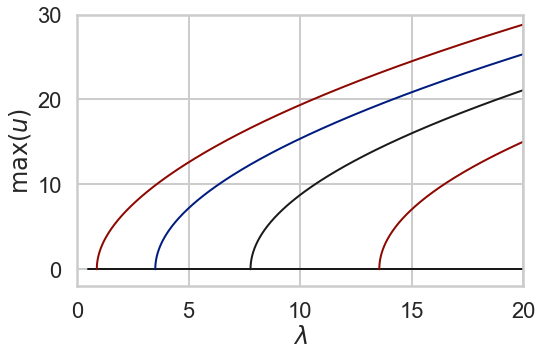

In [12]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(0,20)
ax.set_ylim(-2, 30)
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel("$\max(u)$")
ax.plot(bd_r, bd_x, '-k')
ax.plot(bd_r02, bd_x02, '-r')
ax.plot(bd_r12, bd_x12, '-b')
ax.plot(bd_r22, bd_x22, '-k')
ax.plot(bd_r32, bd_x32, '-r')